In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 230s 1us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

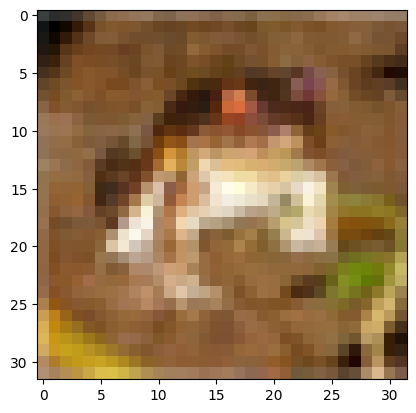

In [6]:
# FROG
plt.imshow(x_train[0])

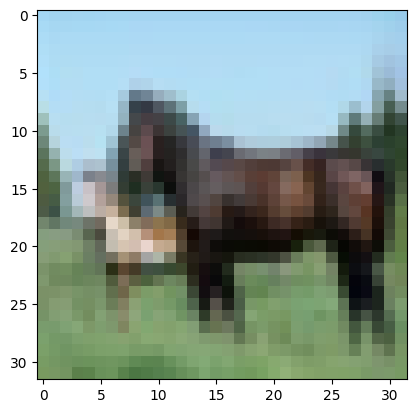

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [27]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 31s 19ms/step - loss: 1.4971 - accuracy: 0.4637 - val_loss: 1.2224 - val_accuracy: 0.5647
Epoch 2/15
1563/1563 [==============================] - 40s 25ms/step - loss: 1.1607 - accuracy: 0.5929 - val_loss: 1.1017 - val_accuracy: 0.6182
Epoch 3/15
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0068 - accuracy: 0.6490 - val_loss: 1.0462 - val_accuracy: 0.6392
Epoch 4/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8968 - accuracy: 0.6914 - val_loss: 1.0346 - val_accuracy: 0.6427
Epoch 5/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8117 - accuracy: 0.7202 - val_loss: 1.0393 - val_accuracy: 0.6495
Epoch 6/15
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7454 - accuracy: 0.7467 - val_loss: 1.0058 - val_accuracy: 0.6683
Epoch 7/15
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6952 - accuracy: 0.7644 - val_loss: 1.0334 -

In [28]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [29]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.497119,0.46366,1.222393,0.5647
1,1.160667,0.59294,1.101715,0.6182
2,1.006839,0.64902,1.046172,0.6392
3,0.896757,0.69138,1.034583,0.6427
4,0.811739,0.72022,1.039273,0.6495


<Axes: >

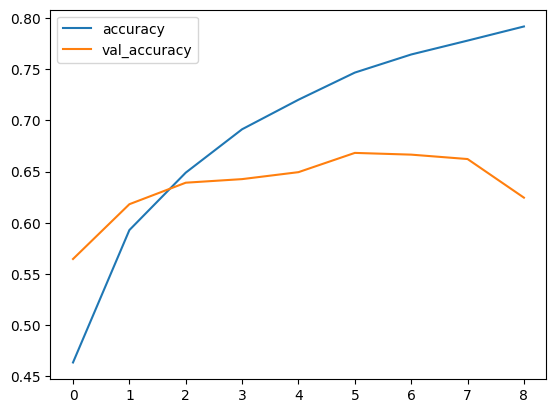

In [31]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

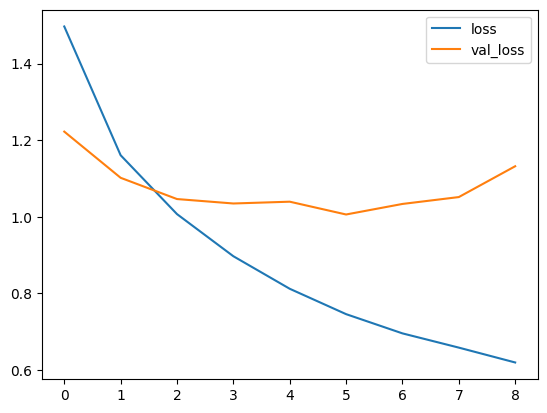

In [32]:
losses[['loss','val_loss']].plot()

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1318918466567993, 0.6245999932289124]


In [37]:
from sklearn.metrics import classification_report,confusion_matrix

# predictions = model.predict_classes(x_test)
predictions = model.predict(x_test).argmax(axis=1) 

313/313 [==============================] - 2s 6ms/step


In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      1000
           1       0.86      0.69      0.76      1000
           2       0.48      0.55      0.51      1000
           3       0.43      0.40      0.41      1000
           4       0.54      0.64      0.58      1000
           5       0.67      0.39      0.49      1000
           6       0.51      0.87      0.65      1000
           7       0.71      0.68      0.70      1000
           8       0.71      0.81      0.76      1000
           9       0.82      0.64      0.71      1000

    accuracy                           0.62     10000
   macro avg       0.65      0.62      0.62     10000
weighted avg       0.65      0.62      0.62     10000



In [39]:
confusion_matrix(y_test,predictions)

array([[595,  14, 109,  39,  48,   6,  44,  15, 113,  17],
       [ 29, 687,  17,  19,  11,   2,  66,  15,  65,  89],
       [ 41,   5, 550,  74, 135,  36, 114,  31,  12,   2],
       [  8,   7, 113, 398, 119,  83, 202,  33,  30,   7],
       [ 11,   2,  97,  53, 637,  11, 125,  48,  11,   5],
       [  7,   5, 130, 187,  83, 387, 118,  61,  17,   5],
       [  1,   1,  41,  30,  40,   3, 869,   7,   7,   1],
       [ 17,   3,  39,  62,  86,  34,  66, 681,   7,   5],
       [ 41,  15,  31,  32,  18,   6,  25,  14, 807,  11],
       [ 46,  64,  20,  34,  13,   6,  62,  52,  68, 635]], dtype=int64)

<Axes: >

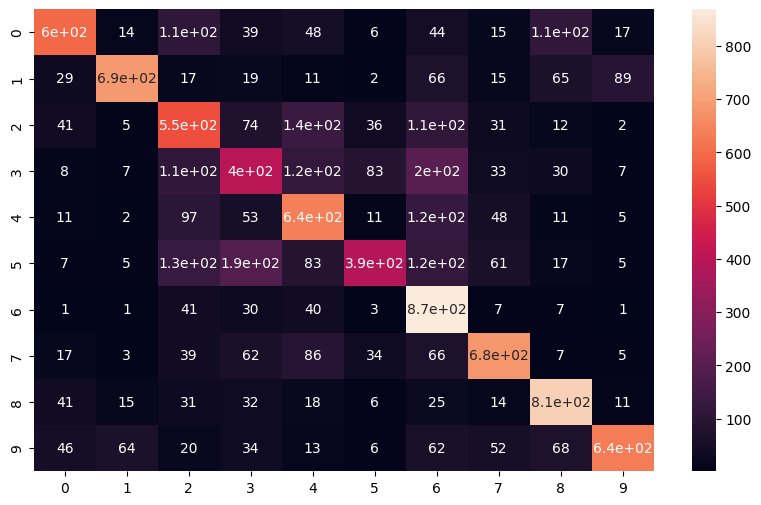

In [40]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [41]:
my_image = x_test[16]

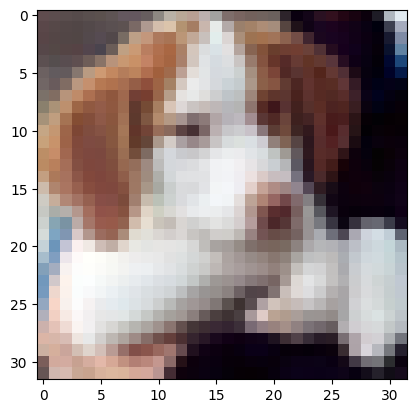

In [42]:
plt.imshow(my_image)

In [44]:
# SHAPE --> (num_images,width,height,color_channels)
# model.predict_classes(my_image.reshape(1,32,32,3))
model.predict(my_image.reshape(1,32,32,3)).argmax(axis=1) 

1/1 [==============================] - 0s 25ms/step


array([5], dtype=int64)

In [ ]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html